In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
data_df = pd.DataFrame(data.data, columns = data.feature_names)

In [17]:
data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
data_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(data_df, data.target, test_size=.25, random_state=700)

### Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisionTree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
decisionTree = decisionTree.fit(data_df, data.target)
decisionTreeValues = cross_val_score(decisionTree, data_df, data.target)

expected_values_decision_tree = [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]
print(f"Accuracy: {metrics.accuracy_score(y_test, decisionTree.predict(X_test))}")
print(f'Cross val score: {decisionTreeValues}')
print(f'Expected values: {expected_values_decision_tree}')

Accuracy: 0.9777777777777777
Cross val score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Expected values: [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]


### Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50)
bagging = bagging.fit(data_df, data.target)
baggingValues = cross_val_score(bagging, data_df, data.target)

expected_values_bagging =  [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.]
print(f"Accuracy: {metrics.accuracy_score(y_test, bagging.predict(X_test))}")
print(f'Cross val score: {baggingValues}')
print(f'Expected values: {expected_values_bagging}')

Accuracy: 1.0
Cross val score: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
Expected values: [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.0]


### AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
adaBoost = adaBoost.fit(data_df, data.target)
adaBoostValues = cross_val_score(adaBoost, data_df, data.target)

expected_values_adaBoost = [0.83333333, 0.91666667, 0.91666667, 1,1]
print(f"Accuracy: {metrics.accuracy_score(y_test, adaBoost.predict(X_test))}")
print(f'Cross val score: {adaBoostValues}')
print(f'Expected values: {expected_values_adaBoost}')

Accuracy: 1.0
Cross val score: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Expected values: [0.83333333, 0.91666667, 0.91666667, 1, 1]


### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
gradientBoosting = gradientBoosting.fit(data_df, data.target)
gradientBoostingValues = cross_val_score(gradientBoosting, data_df, data.target)

expected_values_gradient_boosting = [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]
print(f"Accuracy: {metrics.accuracy_score(y_test, gradientBoosting.predict(X_test))}")
print(f'Cross val score: {gradientBoostingValues}')
print(f'Expected values: {expected_values_gradient_boosting}')

Accuracy: 1.0
Cross val score: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]
Expected values: [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]


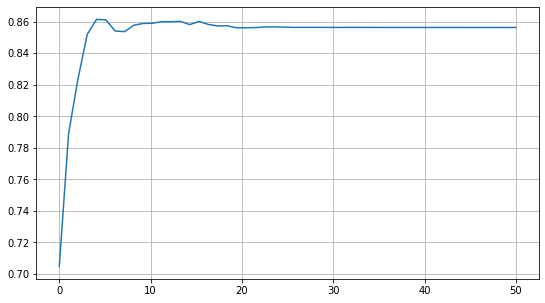

In [24]:
cumsum = np.cumsum(gradientBoosting.oob_improvement_)
plt.figure(figsize=(9,5))
x_val = np.linspace(0,len(cumsum), 50)
plt.plot(x_val, cumsum)
plt.grid()
plt.show()